<a href="https://colab.research.google.com/github/kgaydukova/SLE_model/blob/main/SLE__Hyperuricemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read and preprocessing

In [12]:
file_path = '/content/drive/MyDrive/SLE_data/SLE_huperuricemia.csv'

df = pd.read_csv(file_path, sep = ';')
df = df.dropna(subset=['Name'])

# List of column names to keep (assuming they are in df_cols['Columns'])
selected_columns = [
    "Age", "HU", "BMI", "Ar hypertension", "CAD", "Heart rhythm disoder",
    "arythmia", "Heart attack", "Stroke", "COPD", "Peptic ulcer",
    "Diabetes melitus", "Heart valve disease (1 con, 2 acq)", "Pericarditis",
    "Aortic aneurysm", "B asthma", "Migrane", "Seizure", "Urolithiasis",
    "Cholelithiasis", "Ai thyroiditis", "OA", "AVN", "Reflux", "Constipation",
    "Osteoporosis", "Cushing", "Menstrual irreg", "Anemia",
    "Non all fatty liver disease", "SELENA-SLEDAI", "Qrisk3"
]
# Ensure only existing columns are selected
selected_columns = [col for col in selected_columns if col in df.columns]

# Select columns from df
df_selected = df[selected_columns]

In [4]:
df_selected

,Age,HU,BMI,Ar hypertension,CAD,Heart rhythm disoder,arythmia,Heart attack,Stroke,COPD,...,AVN,Reflux,Constipation,Osteoporosis,Cushing,Menstrual irreg,Anemia,Non all fatty liver disease,SELENA-SLEDAI,Qrisk3
0,18.0,1.0,"19,43",0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"0,00","0,00"
1,19.0,1.0,"17,43",0.0,0.0,0.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"4,00","0,00"
2,20.0,1.0,"29,36",0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,00","0,00"
3,22.0,1.0,"19,14",0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,00","0,00"
4,22.0,1.0,"20,19",1.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"4,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,65.0,1.0,"29,02",1.0,0.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"2,00","0,14"
183,66.0,0.0,"26,93",0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"1,00","0,16"
184,66.0,0.0,"34,2",0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"2,00","0,17"
185,67.0,0.0,"25,57",1.0,1.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,"2,00","0,35"


In [5]:
df_selected[df_selected['HU'] == 1]['HU'].count()

104

In [6]:
df_selected[df_selected['HU'] == 0]['HU'].count()

83

In [13]:
# select columns with different dtype
int_cols = df_selected.select_dtypes(include=['int64']).columns.tolist()
float_cols = df_selected.select_dtypes(include=['float']).columns.tolist()
object_cols = df_selected.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Loop over object columns
for x in object_cols:
    print(x, ' - ', df_selected[x].isna().sum())  # Print count of NaN values

    # Replace commas with dots and fix specific value
    df_selected.loc[:, x] = df_selected[x].astype(str).str.strip()
    df_selected.loc[:, x] = df_selected[x].str.replace(',', '.')
    if x == 'BMI':
      df_selected.loc[:, x] = df_selected[x].str.replace('30.Nov', '30.11')

# Convert all object columns to float
df_selected[object_cols] = df_selected[object_cols].apply(pd.to_numeric, errors='coerce')

# Check data types
print(df_selected.dtypes)

BMI  -  0
arythmia  -  6
SELENA-SLEDAI  -  0
Qrisk3  -  0
Age                                   float64
HU                                    float64
BMI                                   float64
Ar hypertension                       float64
CAD                                   float64
Heart rhythm disoder                  float64
arythmia                              float64
Heart attack                          float64
Stroke                                float64
COPD                                  float64
Peptic ulcer                          float64
Diabetes melitus                      float64
Heart valve disease (1 con, 2 acq)    float64
Pericarditis                          float64
Aortic aneurysm                       float64
B asthma                              float64
Migrane                               float64
Seizure                               float64
Urolithiasis                          float64
Cholelithiasis                        float64
Ai thyroiditis        

<ipython-input-14-3d2222d24961>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[object_cols] = df_selected[object_cols].apply(pd.to_numeric, errors='coerce')


In [15]:
for x in df_selected.columns:
      print(x, ' - ', df_selected[x].isna().sum())  # Print count of NaN values

Age  -  0
HU  -  0
BMI  -  0
Ar hypertension  -  0
CAD  -  0
Heart rhythm disoder  -  0
arythmia  -  24
Heart attack  -  0
Stroke  -  0
COPD  -  0
Peptic ulcer  -  1
Diabetes melitus  -  0
Heart valve disease (1 con, 2 acq)  -  1
Pericarditis  -  1
Aortic aneurysm  -  1
B asthma  -  0
Migrane  -  1
Seizure  -  1
Urolithiasis  -  1
Cholelithiasis  -  0
Ai thyroiditis  -  1
OA  -  1
AVN  -  1
Reflux  -  0
Constipation  -  1
Osteoporosis  -  1
Cushing  -  1
Menstrual irreg  -  1
Anemia  -  1
Non all fatty liver disease  -  0
SELENA-SLEDAI  -  0
Qrisk3  -  0


In [16]:
df_selected = df_selected.dropna()

df_selected = df_selected.apply(lambda x: x.astype(int) if x.name != 'BMI' and x.name!= 'Qrisk3' else x)

In [17]:
df_selected

,Age,HU,BMI,Ar hypertension,CAD,Heart rhythm disoder,arythmia,Heart attack,Stroke,COPD,...,AVN,Reflux,Constipation,Osteoporosis,Cushing,Menstrual irreg,Anemia,Non all fatty liver disease,SELENA-SLEDAI,Qrisk3
0,18,1,19.43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.00
1,19,1,17.43,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,4,0.00
2,20,1,29.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.00
4,22,1,20.19,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,0.00
5,23,1,18.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,65,1,29.02,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,0.14
183,66,0,26.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.16
184,66,0,34.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0.17
185,67,0,25.57,1,1,0,0,0,0,0,...,0,0,0,2,0,0,1,0,2,0.35


# Check correlation

In [ ]:
df_selected = df_selected.dropna()
class_column = df_selected[['HU']]

df_selected_without_class = df_selected.drop(columns=['HU'])  # Assuming df_selected consists of all columns except 'HU'
df_selected_without_class = df_selected_without_class.drop(columns=['Age'])
df_selected_without_class = df_selected_without_class.drop(columns=['BMI'])

In [ ]:
print(class_column.columns)
print (df_selected[df_selected['HU'] == 0]['HU'].count())
print (df_selected[df_selected['HU'] == 1]['HU'].count())

Index(['HU'], dtype='object')
72
89


In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif

def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    denominator = min((k_corr-1), (r_corr-1))
    return np.sqrt(phi2corr / denominator) if denominator > 0 else 0

# Compute Cramér's V for each categorical feature
cramers_v_results = {col: cramers_v(df_selected_without_class[col], class_column['HU']) for col in df_selected_without_class.columns}

# Compute mutual information
mutual_info = mutual_info_classif(df_selected_without_class, class_column.values.ravel(), discrete_features=True)
mutual_info_results = {col: mutual_info[i] for i, col in enumerate(df_selected_without_class.columns)}

# Combine results into a DataFrame
correlation_df = pd.DataFrame({
    'Cramér\'s V': cramers_v_results,
    'Mutual Information': mutual_info_results
})


In [ ]:
correlation_df.columns

Index(['Cramér's V', 'Mutual Information'], dtype='object')

In [ ]:
df_sorted = correlation_df.sort_values(by='Cramér\'s V', ascending=False)


In [ ]:
df_sorted

,Cramér's V,Mutual Information
Ar hypertension,0.300077,0.053647
Stroke,0.181875,0.029242
Seizure,0.175158,0.034471
Ai thyroiditis,0.163816,0.021670
Pericarditis,0.163169,0.023175
Cushing,0.156285,0.019546
Diabetes melitus,0.149855,0.022436
CAD,0.072384,0.012386
Migrane,0.061927,0.006523
"Heart valve disease (1 con, 2 acq)",0.054120,0.011213


# Model the Relationship: logistic regression model
Use a logistic regression model to analyze the relationship between the disease status (binary outcome), age (control variable), and complication (categorical/binary predictor). Logistic regression allows you to determine whether the third variable has a statistically significant impact on the first variable after accounting for age.

In [18]:
df_selected

,Age,HU,BMI,Ar hypertension,CAD,Heart rhythm disoder,arythmia,Heart attack,Stroke,COPD,...,AVN,Reflux,Constipation,Osteoporosis,Cushing,Menstrual irreg,Anemia,Non all fatty liver disease,SELENA-SLEDAI,Qrisk3
0,18,1,19.43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.00
1,19,1,17.43,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,4,0.00
2,20,1,29.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.00
4,22,1,20.19,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,0.00
5,23,1,18.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,65,1,29.02,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,0.14
183,66,0,26.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.16
184,66,0,34.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0.17
185,67,0,25.57,1,1,0,0,0,0,0,...,0,0,0,2,0,0,1,0,2,0.35


In [19]:
df_selected = df_selected[df_selected['Heart attack'] != 13]

# Choosing binary + categorical and continuous columns

In [20]:
binary_symptoms = []
continuous_symptoms = []
for col in df_selected.columns:
    unique_values = set(df_selected[col].unique())
    if unique_values == {0, 1} and col != 'HU':  # Check if unique values are not just {0,1}
      binary_symptoms.append(col)
    elif unique_values == {0, 1, 2}:
      binary_symptoms.append(col)
    elif unique_values != {0} and col != 'HU' and col!='Age' and col!='Age_normalized':
      (print(col, ' - ', unique_values))
      continuous_symptoms.append(col)

print (f'\nBinary columns:\n{binary_symptoms}')
print (f'\nContinuous columns:\n{continuous_symptoms}')

BMI  -  {15.6, 16.56, 17.43, 18.91, 18.04, 18.2, 21.81, 19.43, 20.19, 20.82, 25.26, 26.95, 26.67, 27.0, 27.43, 27.89, 27.38, 32.42, 28.63, 25.52, 29.36, 27.76, 32.35, 36.29, 32.6, 31.64, 33.06, 33.69, 36.84, 37.2, 43.87, 46.29, 40.48, 40.3, 50.02, 16.9, 16.14, 17.36, 17.5, 17.1, 17.4, 17.0, 18.5, 18.4, 18.9, 18.0, 19.53, 19.72, 19.71, 19.6, 19.4, 20.9, 20.0, 20.4, 20.6, 19.9, 21.5, 21.0, 21.4, 21.6, 20.03, 22.15, 22.4, 22.9, 22.1, 23.82, 23.0, 24.97, 24.9, 24.65, 25.86, 25.14, 25.6, 25.1, 25.39, 26.29, 26.9, 26.0, 26.17, 26.93, 28.28, 29.39, 29.08, 29.4, 30.47, 30.11, 30.0, 31.9, 31.25, 31.18, 31.89, 31.83, 32.99, 32.79, 32.0, 33.66, 33.46, 33.05, 34.6, 34.2, 35.06, 36.89, 36.26, 36.06, 37.0, 37.18, 38.06, 25.57, 17.3, 17.7, 17.8, 18.7, 18.3, 19.23, 19.37, 19.56, 19.7, 20.98, 20.06, 20.8, 20.2, 20.7, 21.77, 21.7, 20.3, 20.76, 21.94, 23.34, 23.51, 23.87, 23.7, 24.62, 24.34, 24.13, 24.8, 24.2, 24.7, 27.8, 28.31, 28.3, 29.38, 29.01, 29.02, 30.48, 30.84, 30.8, 31.02}
SELENA-SLEDAI  -  {0, 

# Start with logistic model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def paint_confision_matrix(conf_matrix_for_symptom, symptom):
  plt.figure(figsize=(4, 3))
  sns.set(font_scale=1.2)
  sns.heatmap(conf_matrix_for_symptom, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  title_for_confusion_matrix = symptom + ' Confusion Matrix'
  plt.title(title_for_confusion_matrix)
  plt.show()

In [21]:
def log_reg_for_continuous_symptoms(df, symptom, adj_threshold, test_size_n):
  # Assuming df is your DataFrame
  scaler = MinMaxScaler()

  df.loc[:, 'Age_normalized'] = scaler.fit_transform(df[['Age']])

  name_for_norm_col = str(symptom) + '_normalized'
  df.loc[:, name_for_norm_col] = scaler.fit_transform(df[[symptom]])

  # Split data into predictors (X) and outcome (y)
  X = df[['Age_normalized', name_for_norm_col]]
  y = df['HU']

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_n, random_state=42)

  # Initialize and fit the logistic regression model
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)

  # Predict on test set
  y_pred = log_reg.predict(X_test)
  y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

  # Set a custom threshold (e.g., 0.3 instead of 0.5)
  y_pred_custom = (y_pred_prob >= adj_threshold).astype(int)  # Convert probabilities to binary predictions


  conf_matrix = confusion_matrix(y_test, y_pred_custom)
  #paint_confision_matrix (conf_matrix, symptom)

  # Extract TP, TN, FP, FN
  TN, FP, FN, TP = conf_matrix.ravel()

  # Compute Sensitivity (Recall) and Specificity
  sensitivity = TP / (TP + FN)  # True Positive Rate
  specificity = TN / (TN + FP)  # True Negative Rate

   # Get the coefficients
  coefficients = log_reg.coef_[0]  # Coefficients for the predictors
  intercept = log_reg.intercept_[0]  # Intercept term

  if sensitivity > 0.6 and specificity > 0.6:
    print (f'{symptom} Model with threshold = {adj_threshold} and test size = {test_size_n}:')
    paint_confision_matrix (conf_matrix, symptom)
    print(f"{symptom} model Sensitivity (Recall): {sensitivity:.2f}")
    print(f"\n{symptom} model Specificity: {specificity:.2f}")

    print(f'\n{symptom} model Intercept:', intercept)

    coef_dict = dict(zip(['Age_normalized', symptom], coefficients))
    print(f'\n{symptom} model Coefficients:', coef_dict, '\n\n\n')

In [22]:
continuous_symptoms

['BMI', 'SELENA-SLEDAI', 'Qrisk3']

SELENA-SLEDAI Model with threshold = 0.5 and test size = 0.25:


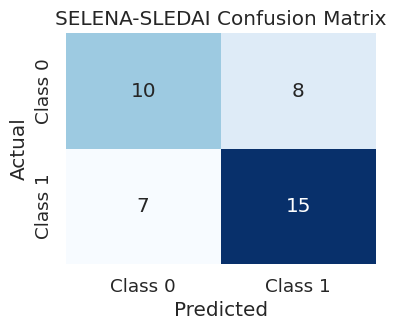

SELENA-SLEDAI model Sensitivity (Recall): 0.68

SELENA-SLEDAI model Specificity: 0.56

SELENA-SLEDAI model Intercept: -0.6011527403623971

SELENA-SLEDAI model Coefficients: {'Age_normalized': 1.3354633647967358, 'SELENA-SLEDAI': 0.6581801027991683} 





In [ ]:
log_reg_for_continuous_symptoms(df_selected, 'SELENA-SLEDAI', 0.50, 0.25)

In [ ]:
def log_reg_for_binary_symptoms(df, symptom, adj_threshold, test_size_n):
  # Assuming df is your DataFrame
  scaler = MinMaxScaler()

  df.loc[:, 'Age_normalized'] = scaler.fit_transform(df[['Age']])


  # Split data into predictors (X) and outcome (y)
  X = df[['Age_normalized', symptom]]
  y = df['HU']

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_n, random_state=42)

  # Initialize and fit the logistic regression model
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)

  # Predict on test set
  y_pred = log_reg.predict(X_test)
  y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

  # Set a custom threshold (e.g., 0.3 instead of 0.5)
  y_pred_custom = (y_pred_prob >= adj_threshold).astype(int)  # Convert probabilities to binary predictions


  conf_matrix = confusion_matrix(y_test, y_pred_custom)
  #paint_confision_matrix (conf_matrix, symptom)

  # Extract TP, TN, FP, FN
  TN, FP, FN, TP = conf_matrix.ravel()

  # Compute Sensitivity (Recall) and Specificity
  sensitivity = TP / (TP + FN)  # True Positive Rate
  specificity = TN / (TN + FP)  # True Negative Rate

   # Get the coefficients
  coefficients = log_reg.coef_[0]  # Coefficients for the predictors
  intercept = log_reg.intercept_[0]  # Intercept term

  if sensitivity > 0.6 and specificity > 0.6 and (coefficients[0] < coefficients[1]):
    print (f'{symptom} Model with threshold = {adj_threshold} and test size = {test_size_n}:')
    paint_confision_matrix (conf_matrix, symptom)
    print(f"{symptom} model Sensitivity (Recall): {sensitivity:.2f}")
    print(f"\n{symptom} model Specificity: {specificity:.2f}")

    print(f'\n{symptom} model Intercept:', intercept)

    coef_dict = dict(zip(['Age_normalized', symptom], coefficients))
    print(f'\n{symptom} model Coefficients:', coef_dict, '\n\n\n')

# Test our function

Ar hypertension Model with threshold = 0.45 and teest size = 0.25:


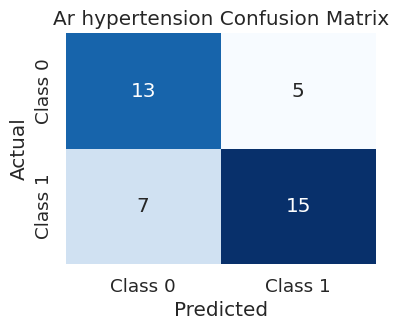

Ar hypertension model Sensitivity (Recall): 0.68

Ar hypertension model Specificity: 0.72

Ar hypertension model Intercept: -0.5124785087631917

Ar hypertension model Coefficients: {'Age_normalized': 0.7711541613114534, 'Ar hypertension': 0.9043080680985761}


In [ ]:
log_reg_for_binary_symptoms(df_selected, 'Ar hypertension', 0.45, 0.25)

In [ ]:
log_reg_for_binary_symptoms(df_selected, 'Stroke', 0.55, 0.25)

# Run our function for **binary and categorical** columns with different thresholds and test_sizes

In [ ]:
threshold_array = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
test_size_array = [0.2, 0.25, 0.3]

Ar hypertension Model with threshold = 0.45 and test size = 0.25:


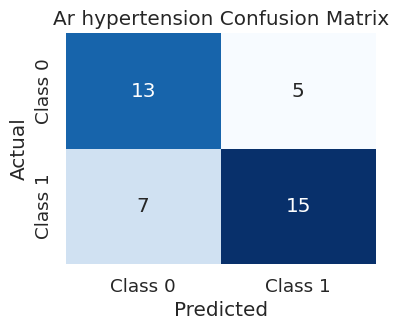

Ar hypertension model Sensitivity (Recall): 0.68

Ar hypertension model Specificity: 0.72

Ar hypertension model Intercept: -0.5124785087631917

Ar hypertension model Coefficients: {'Age_normalized': 0.7711541613114534, 'Ar hypertension': 0.9043080680985761} 



Stroke Model with threshold = 0.5 and test size = 0.25:


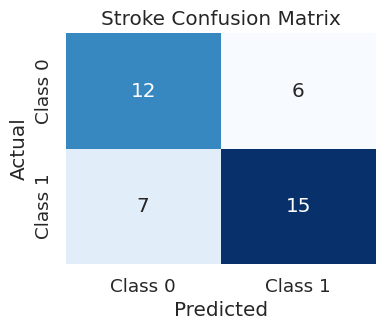

Stroke model Sensitivity (Recall): 0.68

Stroke model Specificity: 0.67

Stroke model Intercept: -0.46879455826664895

Stroke model Coefficients: {'Age_normalized': 1.1885181651202716, 'Stroke': 1.4996615021706396} 



Pericarditis Model with threshold = 0.5 and test size = 0.25:


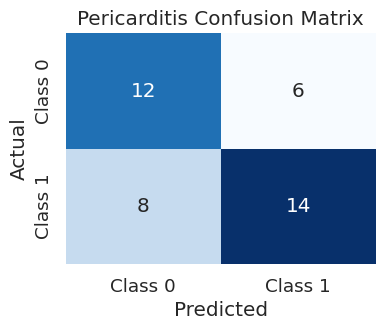

Pericarditis model Sensitivity (Recall): 0.64

Pericarditis model Specificity: 0.67

Pericarditis model Intercept: -0.540475815785429

Pericarditis model Coefficients: {'Age_normalized': 1.3025564410241133, 'Pericarditis': 1.3505950829199862} 



Seizure Model with threshold = 0.5 and test size = 0.25:


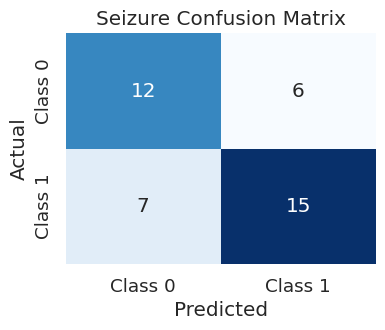

Seizure model Sensitivity (Recall): 0.68

Seizure model Specificity: 0.67

Seizure model Intercept: -0.4870050502839894

Seizure model Coefficients: {'Age_normalized': 1.2725990306188686, 'Seizure': 1.4022643657026042} 



Stroke Model with threshold = 0.5 and test size = 0.3:


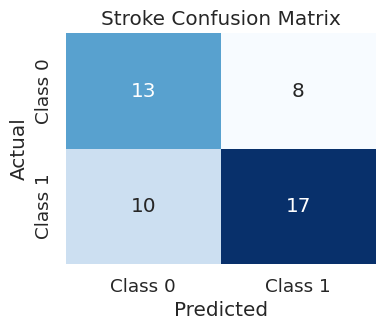

Stroke model Sensitivity (Recall): 0.63

Stroke model Specificity: 0.62

Stroke model Intercept: -0.4664590104872129

Stroke model Coefficients: {'Age_normalized': 1.1292209643828433, 'Stroke': 1.5178544240443128} 



Seizure Model with threshold = 0.5 and test size = 0.3:


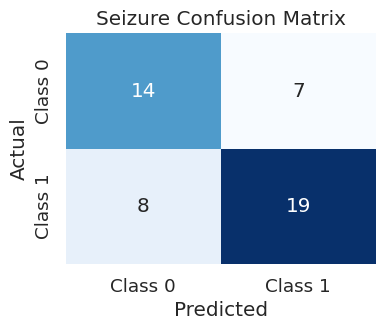

Seizure model Sensitivity (Recall): 0.70

Seizure model Specificity: 0.67

Seizure model Intercept: -0.4836987566800195

Seizure model Coefficients: {'Age_normalized': 1.2163023401390418, 'Seizure': 1.4142859795004032} 





In [ ]:
for t in threshold_array:
  for s in test_size_array:
    for sym in binary_symptoms:
      log_reg_for_binary_symptoms(df_selected, sym, t, s)

# Run our function for **continuous** columns with different thresholds and test_sizes

In [24]:
threshold_array = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
test_size_array = [0.2, 0.25, 0.3]

BMI Model with threshold = 0.5 and test size = 0.2:


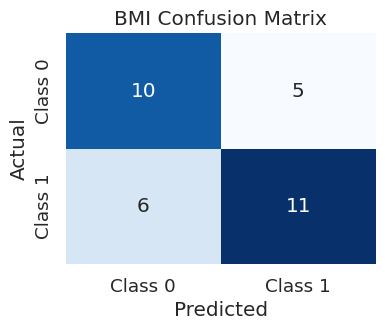

BMI model Sensitivity (Recall): 0.65

BMI model Specificity: 0.67

BMI model Intercept: -0.6615425426819327

BMI model Coefficients: {'Age_normalized': 1.1797126399908189, 'BMI': 1.0877646213011984} 



BMI Model with threshold = 0.5 and test size = 0.25:


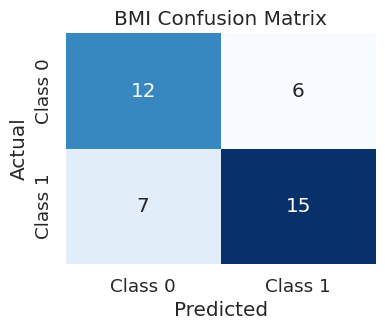

BMI model Sensitivity (Recall): 0.68

BMI model Specificity: 0.67

BMI model Intercept: -0.6108909332714951

BMI model Coefficients: {'Age_normalized': 1.068589270850943, 'BMI': 1.0288580026947687} 



BMI Model with threshold = 0.5 and test size = 0.3:


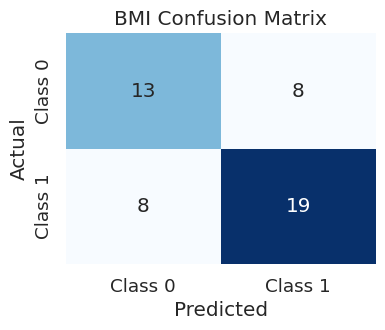

BMI model Sensitivity (Recall): 0.70

BMI model Specificity: 0.62

BMI model Intercept: -0.593018076657409

BMI model Coefficients: {'Age_normalized': 1.0326172652250283, 'BMI': 0.9667729386594609} 



Qrisk3 Model with threshold = 0.5 and test size = 0.3:


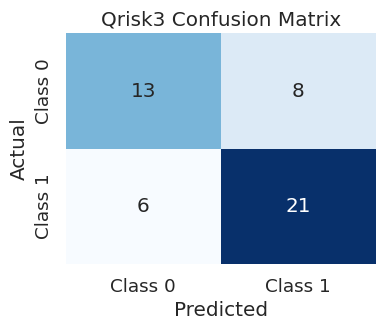

Qrisk3 model Sensitivity (Recall): 0.78

Qrisk3 model Specificity: 0.62

Qrisk3 model Intercept: -0.45100750569531917

Qrisk3 model Coefficients: {'Age_normalized': 0.921338061576619, 'Qrisk3': 0.9916115860019679} 





In [29]:
for t in threshold_array:
  for s in test_size_array:
    for sym in continuous_symptoms:
      log_reg_for_continuous_symptoms(df_selected, sym, t, s)